Part of Assignment from 42028 Deep Learning and Convolutional Neural Network


## Support Vector Machine (SVM) Classification

### Connect to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


### Change the directory to access the MNIST Dataset
***Note: This code might require changes***

In [2]:
cd /content/gdrive/My Drive/Assignment-1

/content/gdrive/My Drive/Assignment-1


### Import the packages

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from skimage import feature
from sklearn import svm
from sklearn import metrics
%matplotlib inline
import cv2
import seaborn as sns 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Dataset preparation
Load the dataset

In [0]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [5]:
X_train, y_train = load_mnist('/content/gdrive/My Drive/Assignment-1', kind='train')
X_test, y_test = load_mnist('/content/gdrive/My Drive/Assignment-1', kind='t10k')

print("MNIST data loaded")

MNIST data loaded


Create  label names for image classification

In [0]:
labelNames = ["0","1","2","3","4","5","6","7","8","9"]

Check the dataset size

In [7]:
print(np.shape(X_train))
print(np.shape(X_test))

(60000, 784)
(10000, 784)


Reshape the feature vector back into the 28X28 image

In [8]:
X_train= X_train.reshape(-1,28,28)
X_test= X_test.reshape(-1,28,28)

#Data set size after reshaping
print("Train set size after reshaping: {}".format(np.shape(X_train)))
print("Test set size after reshaping: {}".format(np.shape(X_test)))

Train set size after reshaping: (60000, 28, 28)
Test set size after reshaping: (10000, 28, 28)


### Display the Dataset

Visualise the images and show the corresponding labels

The corresponding labels:
3
3
The images:


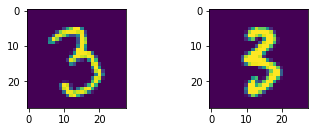

In [9]:
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
img_index_1 = 30000
img_index_2 = 45000

print('The corresponding labels:')
ax1.imshow(X_train[img_index_1])
ax2.imshow(X_train[img_index_2])
print(labelNames[y_train[img_index_1]])
print(labelNames[y_train[img_index_2]])
print('The images:')

### Histogram of Oriented Gradient (HOG) feature extraction

In [10]:
print("Extracting features from training dataset...")

#create two empty arrays to hold the images and coresponding labels
#after feature extraction
HOGimages_train = []
HOGlabels_train = []

#loop over the training images
for HOG_img_index in range(len(X_train)):
  #load the image
  HOG_image = (X_train[HOG_img_index])

  #extraction with hog feature
  HOG = feature.hog(HOG_image, orientations= 10, pixels_per_cell=(13,13), 
                    cells_per_block=(2,2), transform_sqrt=True, 
                    block_norm="L2-Hys")
 
  #add the images to array
  HOGimages_train.append(HOG)
  #extract the label from the image path and add labels to array
  HOGlabels_train.append(y_train[HOG_img_index])

#print the shape
print(np.shape(HOGimages_train))
print(np.shape(HOGlabels_train))

Extracting features from training dataset...
(60000, 40)
(60000,)


### Local Binary Patterns (LBP) feature extraction

create class definition for LBP

In [0]:
class LocalBinaryPatterns:
  #create a constructor with two values, numPoint as thresholding and radius
	def __init__(self, numPoints, radius):
		self.numPoints = numPoints
		self.radius = radius
  
  #create a LBP function
	def LBPfeatures(self, image, eps=1e-7):
		lbp = feature.local_binary_pattern(image, self.numPoints, self.radius, 
                                     method="uniform")
  
    #convert LBP feature into the histogram
		(hist, _) = np.histogram(lbp.ravel(),bins=np.arange(0, self.numPoints + 3),
                           range=(0, self.numPoints + 2))
 
		#normalize the histogram
		hist = hist.astype("float")
		hist /= (hist.sum() + eps)
 
		#return the LBP histogram
		return hist

Extract the training data set with LBP feature

In [0]:
#create an instance to access the function in LocalBinaryPatterns class
desc = LocalBinaryPatterns(24, 4)

#create two empty arrays to hold the images and coresponding labels
#after feature extraction
LBPdata_train = []
LBPlabels_train = []

#loop over the training images
for LBP_img_index in range(len(X_train)):
  #load the image
  LBP_image = (X_train[LBP_img_index])

  #extraction with LBP features
  hist = desc.LBPfeatures(LBP_image)
 
  #add the images to array
  LBPdata_train.append(hist)
	#extract the label from the image path and add labels to array
  LBPlabels_train.append(y_train[LBP_img_index])

In [13]:
print(np.shape(LBPdata_train))
print(np.shape(LBPlabels_train))

(60000, 26)
(60000,)


### Support Vector Machine (SVM) Classification with HOG

Create Support Vector Machine (SVM) model

In [0]:
SVMmodel = svm.SVC(kernel = 'poly', C=100.00, random_state=50, gamma=0.7, degree=2)

Fit the model to training dataset

***Note: this process might take long time...***



In [15]:
SVMmodel.fit(HOGimages_train, HOGlabels_train)

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.7, kernel='poly',
    max_iter=-1, probability=False, random_state=50, shrinking=True, tol=0.001,
    verbose=False)

Check the training accuracy

In [16]:
SVM_train_acc1 = SVMmodel.score(HOGimages_train,HOGlabels_train)
print('Train set Accuracy:', SVM_train_acc1)

Train set Accuracy: 0.9741833333333333


Evaluate the trained KNN model on test dataset

***Note: this process might also take long time...***

In [17]:
print("Extracting features from test dataset...")

#create two empty arrays to hold the images and coresponding labels
#after classification
labels_test = []
images_test=[]
#create an empty array to hold the prediction data
predict_test = []

#loop over the test images
for imag_index in range(len(X_test)):
  #extraction with HOG feature
  img=X_test[imag_index]
  HOG = feature.hog(img, orientations=10, pixels_per_cell=(13, 13),
                  cells_per_block=(2, 2), transform_sqrt=True,
                  block_norm="L2-Hys")
  
  #perfom the classification
  y_predicted=SVMmodel.predict(HOG.reshape(1, -1))[0]
  predict_test.append(y_predicted)

  #Store the classfication result
  images_test.append(HOG)
  labels_test.append(y_test[imag_index])

print(np.shape(predict_test))
print(np.shape(labels_test))

Extracting features from test dataset...
(10000,)
(10000,)


Check test set Accuracy

In [18]:
test_accuracy = metrics.accuracy_score(y_test, predict_test )
print("Accuracy on test dataset:",test_accuracy)

Accuracy on test dataset: 0.9477


### Confusion matrix
Create the confusion matrix using seaborn library

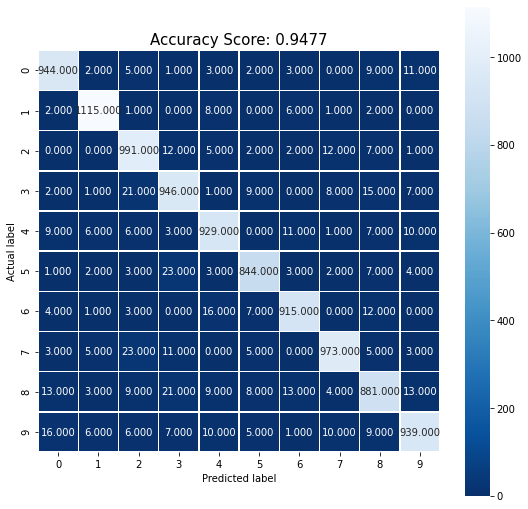

In [19]:
#set and plot the confusion matrix
cMatrix  = metrics.confusion_matrix(y_test, predict_test)
plt.figure(figsize=(9,9))
sns.heatmap(cMatrix, annot=True, fmt=".3f", linewidths=.5, square = True, 
            cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

title = 'Accuracy Score: {0}'.format(test_accuracy)
plt.title(title, size = 15);

### Visualise the classification result

Create a variable for label prediction & arrange the visualisation setting

In [0]:
#create two empty arrays to hold the data
images = []
labels=[]

#classify images with the coresponding labels
for i in np.random.choice(np.arange(0, len(y_test)), size=(16,)):
  test_img = (X_test[i])
  HOG1 = feature.hog(test_img, orientations=10, pixels_per_cell=(13, 13),
                  cells_per_block=(2, 2), transform_sqrt=True, 
                   block_norm="L2-Hys")
  
  prediction = SVMmodel.predict(HOG1.reshape(1, -1))[0]
  label = labelNames[prediction]

  #add original label data to dataset_label[]
  labels.append(labelNames[y_test[i]])

  #set the label color, merge the image, and resize the image 
  color = (255, 255, 0)
  test_img = cv2.merge([test_img] * 3)
  test_img = cv2.resize(test_img, (96, 96), interpolation=cv2.INTER_LINEAR)

  #add the prediction label to image
  cv2.putText(test_img, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 
              0.50, color, 2)
  
  #store the image data to images[]
  images.append(test_img)

Display some classification result

The corresponding labels:
5
7
3
7
The images:


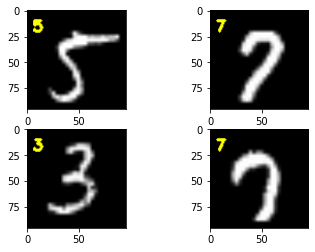

In [21]:
fig = plt.figure()
#plot the image
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

#show image
ax1.imshow(images[1])
ax2.imshow(images[2])
ax3.imshow(images[3])
ax4.imshow(images[4])

#print the labels
print('The corresponding labels:')
print(labels[1])
print(labels[2])
print(labels[3])
print(labels[4])
print('The images:')

###Support Vector Machine (SVM) Classification with LBP

Create Support Vector Machine (SVM) model

In [0]:
SVMmodel1 = svm.SVC(kernel = 'poly', C=100.00, random_state=42)

Fit the model to training dataset

***Note: this process might take long time...***



In [23]:
SVMmodel1.fit(LBPdata_train, LBPlabels_train)

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

Check training accuracy

In [24]:
SVM_train_acc2 = SVMmodel1.score(LBPdata_train,LBPlabels_train)
print('Train set Accuracy:', SVM_train_acc2)

Train set Accuracy: 0.56575


Evaluate the trained KNN model on test dataset

***Note: this process might also take long time...***

In [0]:
#create two empty arrays to hold the images and coresponding labels
#after classification
predict_image=[]
predict_label=[]

# Exract LBP features for each test sample and classify it with the trained SVM classifier
for im_index in range(len(X_test)):
  images = X_test[im_index]

  # Extract LBP feature
  histo = desc.LBPfeatures(images)
  # Perform classification
  predictions = SVMmodel1.predict(histo.reshape(1, -1))
  # Store the classfication result
  predict_image.append(predictions)
  predict_label.append(y_test[im_index])

Check test accuracy

In [26]:
SVM_accuracy = metrics.accuracy_score(y_test, predict_image)
print("Accuracy on test dataset:", SVM_accuracy)

Accuracy on test dataset: 0.5723


### Confusion matrix
Create confusion matrix using seaborn library

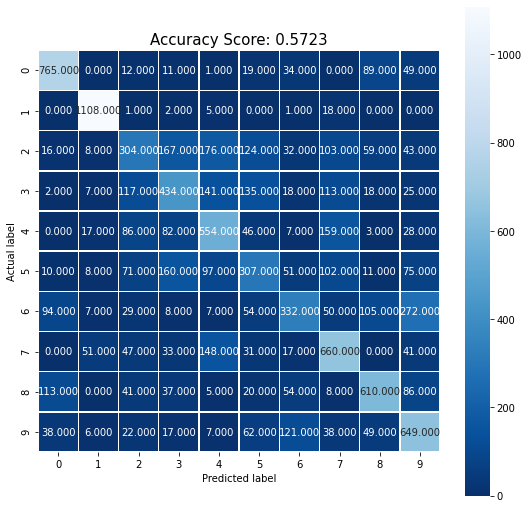

In [27]:
#set and plot the confussion matrix
Con_Matrix1  = metrics.confusion_matrix(y_test, predict_image)
plt.figure(figsize=(9,9))
sns.heatmap(Con_Matrix1, annot=True, fmt=".3f", linewidths=.5, square = True,
            cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
Matrix_Title = 'Accuracy Score: {0}'.format(SVM_accuracy)

#plot the confussion matrix
plt.title(Matrix_Title, size = 15);

### Visualise the classification result

Create a variable for label prediction & arrange the visualisation setting


In [0]:
# Display the some classification result on test samples
images1 = []
initial_labels=[]

# randomly select a few testing fashion items
for i in np.random.choice(np.arange(0, len(y_test)), size=(16,)):
  #classify images with the coresponding labels
  image = X_test[i]
  histo1 = desc.LBPfeatures(image)
  prediction = SVMmodel1 .predict(histo1.reshape(1, -1))
  #store the label prediction result
  label = labelNames[prediction[0]]

  initial_labels.append(labelNames[y_test[i]])

  color = (255, 255, 0)
  image = cv2.merge([image] * 3)
  image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
  cv2.putText(image, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50, color, 2)
  images1.append(image)

Display some classification result

The corresponding labels:
0
3
1
6
The images:


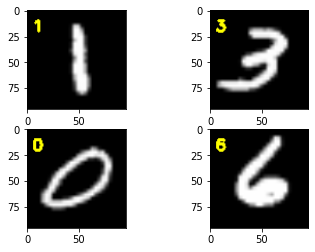

In [29]:
fig = plt.figure()
#plot the image
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

#show image
ax1.imshow(images1[1])
ax2.imshow(images1[2])
ax3.imshow(images1[3])
ax4.imshow(images1[4])

#print the labels
print('The corresponding labels:')
print(initial_labels[3])
print(initial_labels[2])
print(initial_labels[1])
print(initial_labels[4])
print('The images:')